In [1]:
#라이브러리 세팅
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('gpascore.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   425 non-null    int64  
 1   gre     425 non-null    int64  
 2   gpa     425 non-null    float64
 3   rank    425 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.4 KB


In [2]:
#데이터 전처리
y_data = data['admit'].values
print(y_data[:5])

x_data = data[['gre', 'gpa', 'rank']]
print(x_data[:5])

# x_data를 표준화
scaler = StandardScaler()
x_data_normalized = scaler.fit_transform(x_data)
print(x_data_normalized[:5])

[0 1 1 1 0]
   gre   gpa  rank
0  380  3.21     3
1  660  3.67     3
2  800  4.00     1
3  640  3.19     4
4  520  2.33     4
[[-1.80429683 -0.44477549  0.54842931]
 [ 0.55283702  0.71817232  0.54842931]
 [ 1.73140395  1.55246097 -1.56091419]
 [ 0.38447032 -0.49533844  1.60310106]
 [-0.6257299  -2.66954521  1.60310106]]


In [4]:
# 모델
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(3,)),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')])

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련 (NumPy 배열로 데이터 형변환)
x_data_normalized = np.array(x_data_normalized)
y_data = np.array(y_data)
model.fit(x_data_normalized, y_data, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 1ms/step - loss: 0.6231 - accuracy: 0.6988
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.8024
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.8094
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8094
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8071
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.8094
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8094
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8118
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.8118
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.8118
Epoch 11/

14/14 [==============================] - 0s 948us/step


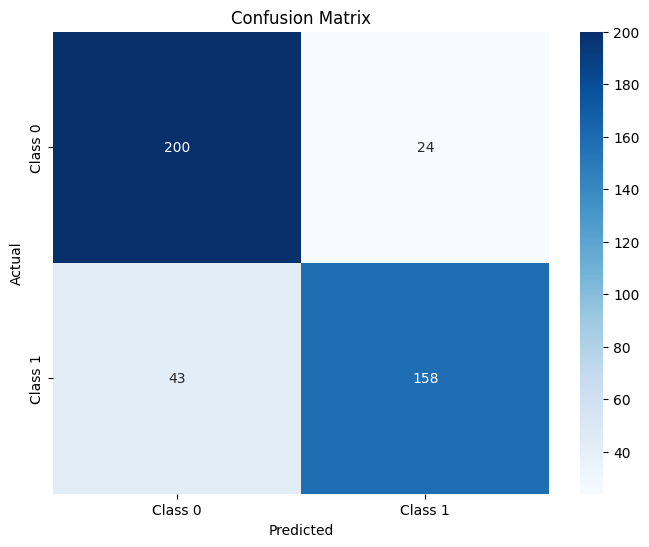

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 모델을 사용하여 예측 수행
predictions = model.predict(x_data_normalized)
# 예측 결과에서 클래스 인덱스로 변환
predicted_classes = np.argmax(predictions, axis=1)

# 혼돈 행렬 생성
cm = confusion_matrix(y_data, predicted_classes)

# 혼돈 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


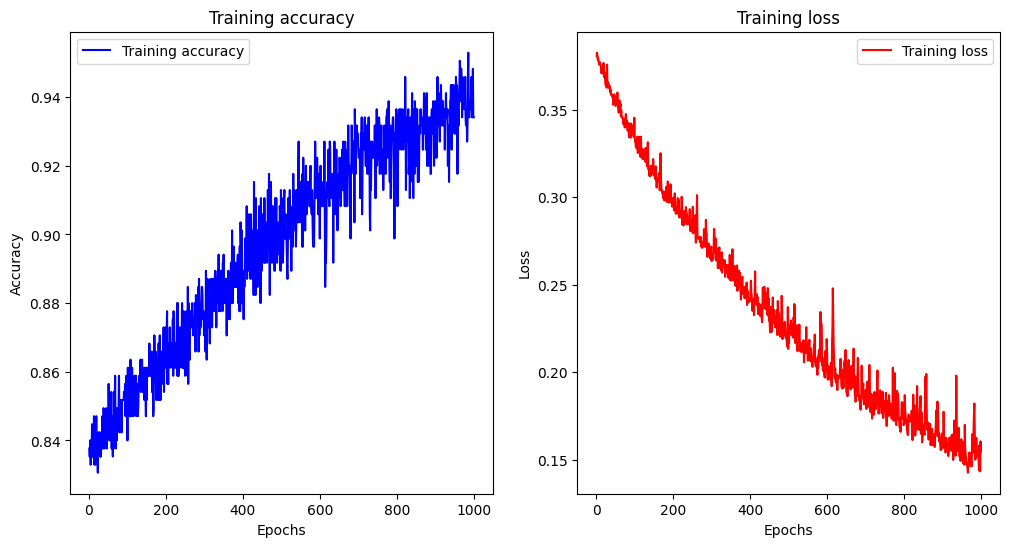

In [6]:
import matplotlib.pyplot as plt

# 모델 훈련
history = model.fit(x_data_normalized, y_data, epochs=1000, verbose=0)

# 훈련 결과 가져오기
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

# 정확도와 손실율 시각화
plt.figure(figsize=(12, 6))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실율 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [7]:
model.save("predic_model.keras")